In [221]:
#Weslley Lioba Caldas

# Stochastic Gradient Descendent

## importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from scipy import stats

## importando os dados

In [2]:
df=pd.read_csv('ex1data1.txt',header=None)
df.columns=['x1','y']
#Adcionando o intercept
df.insert(loc=0, column='x0', value=1)

## Apresentando os dados

In [3]:
df.head()

,x0,x1,y
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


## Definindo os parâmetros

In [4]:
#definindo os parâmetros
alfa= 0.001;
epocas=1000;
#pesos aleatórios menores que zero
w=np.random.randn(1, 2)[0]/100

## Distribuição dos dados

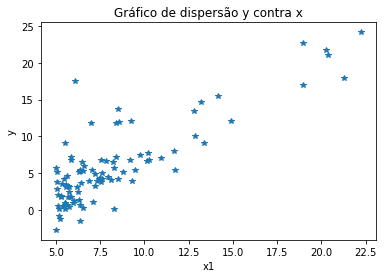

In [5]:
plt.plot(df.x1,df.y,'*')
plt.title('Gráfico de dispersão y contra x')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

## SGD

In [6]:
#transformando de pandas para numpy array
data=df.values
#lista contendo o erro quadrático médio por época
eqm=[]
for i in range(epocas):
    #embaralha os dados
    np.random.shuffle(data)
    sum_eqm=0
    for instance in data:
        #as duas primeiras linhas são o input(uma variável e o intercept)
        x=instance[0:2]
        # a ultima linha é o output esperardo
        y=instance[2]
        y_h=np.matmul(w,x)
        erro=y-y_h
        sum_eqm=sum_eqm+(erro*erro)
        w[0] = w[0] + alfa*erro;
        w[1] = w[1] + alfa*erro*x[1]
    eqm.append(sum_eqm/len(data))

### Plot do Erro Quadrático Médio

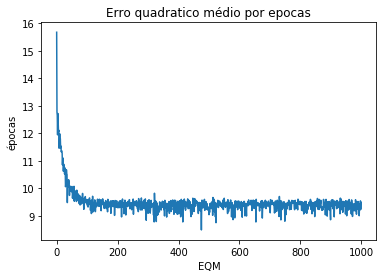

In [7]:
plt.plot(eqm)
plt.title('Erro quadratico médio por epocas')
plt.xlabel('EQM')
plt.ylabel('épocas')
plt.show()
#Na medida que as épocas passam o EQM diminui, o que indica o aprendizago

### Plot da reta de regressão

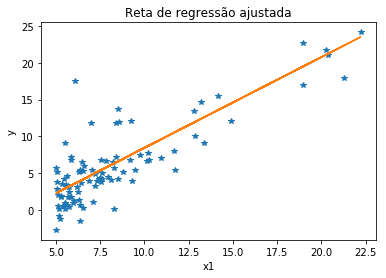

In [8]:
plt.plot(df.x1,df.y,'*')
plt.plot(df.x1,np.matmul(df[['x0','x1']].values,w),'-')
plt.title('Reta de regressão ajustada')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

### Plot da saída esperada X saída aproximada

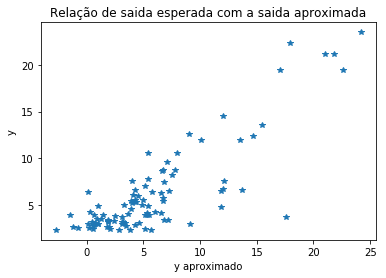

In [9]:
#quanto mais os dados aproximados da variável de resposta se aproximar dos dados originais, mais a distribuição deles se assemelhará a uma reta
plt.plot(df.y,np.matmul(df[['x0','x1']].values,w),'*')
plt.title('Relação de saida esperada com a saida aproximada')
plt.xlabel('y aproximado')
plt.ylabel('y')
plt.show()

### Distribuição dos erros

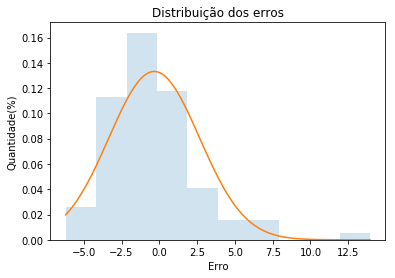

In [10]:
#quanto mais a distribuição dos erros se aproxima de uma distribuição normal, melhor é o modelo
vetor_erros=list(df.y-np.matmul(df[['x0','x1']].values,w))
u,std=stats.norm.fit(vetor_erros)
plt.hist(vetor_erros,density=True, histtype='stepfilled', alpha=0.2)
x_lin=np.linspace(min(vetor_erros),max(vetor_erros),200)
pdf=stats.norm.pdf(x_lin,u,std)
plt.plot(x_lin,pdf)
plt.title('Distribuição dos erros')
plt.xlabel('Erro')
plt.ylabel('Quantidade(%)')
plt.show()